In [14]:
import pandas as pd
import numpy as np

In [15]:
dt = pd.read_csv('50_Startups.csv')
dt.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# dt.isna().sum()
X = dt[['PROFIT']]
X.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
XN = scale.fit_transform(X)

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

WARD


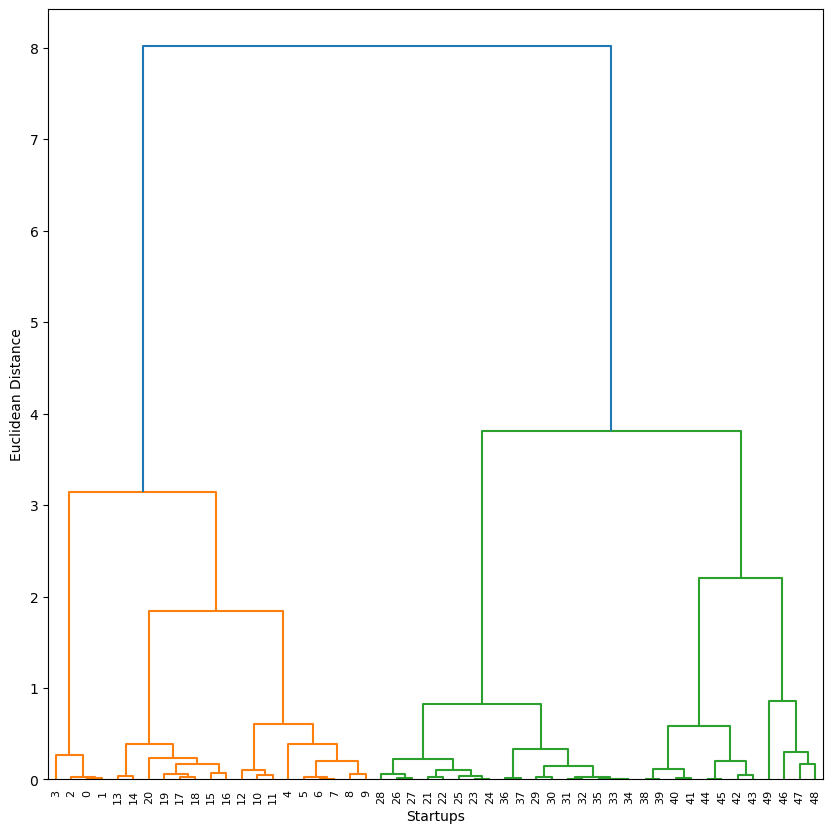

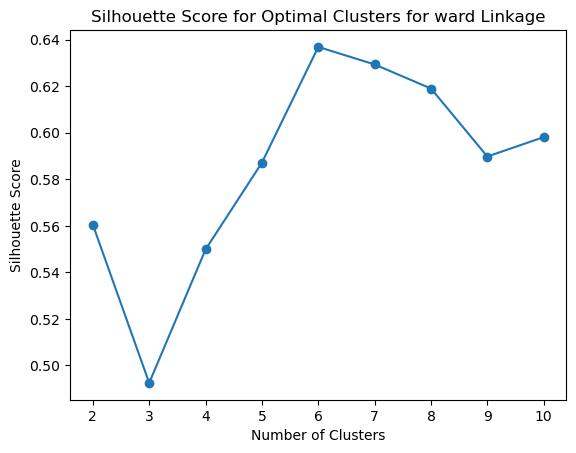

COMPLETE


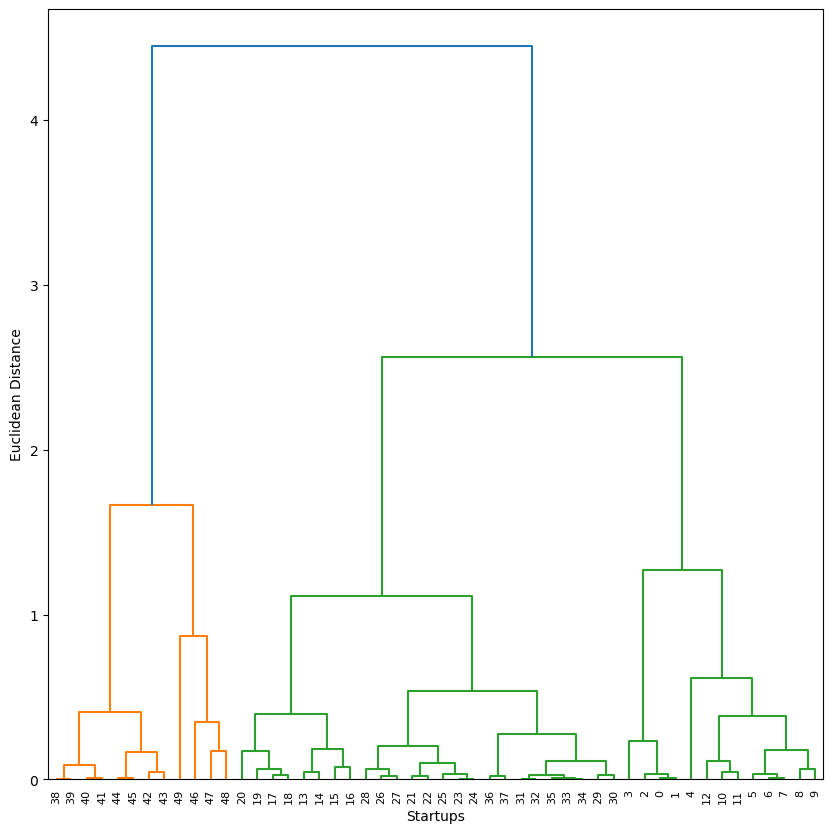

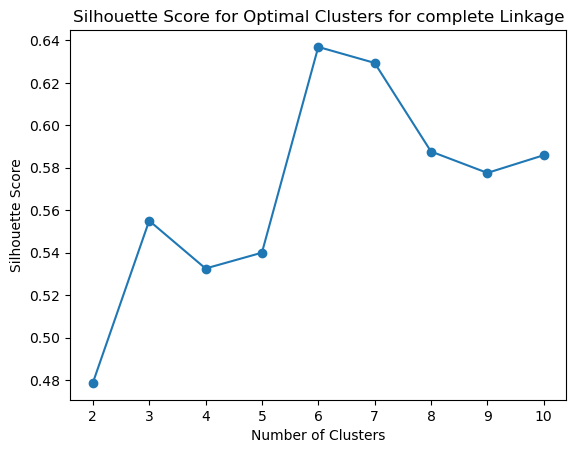

SINGLE


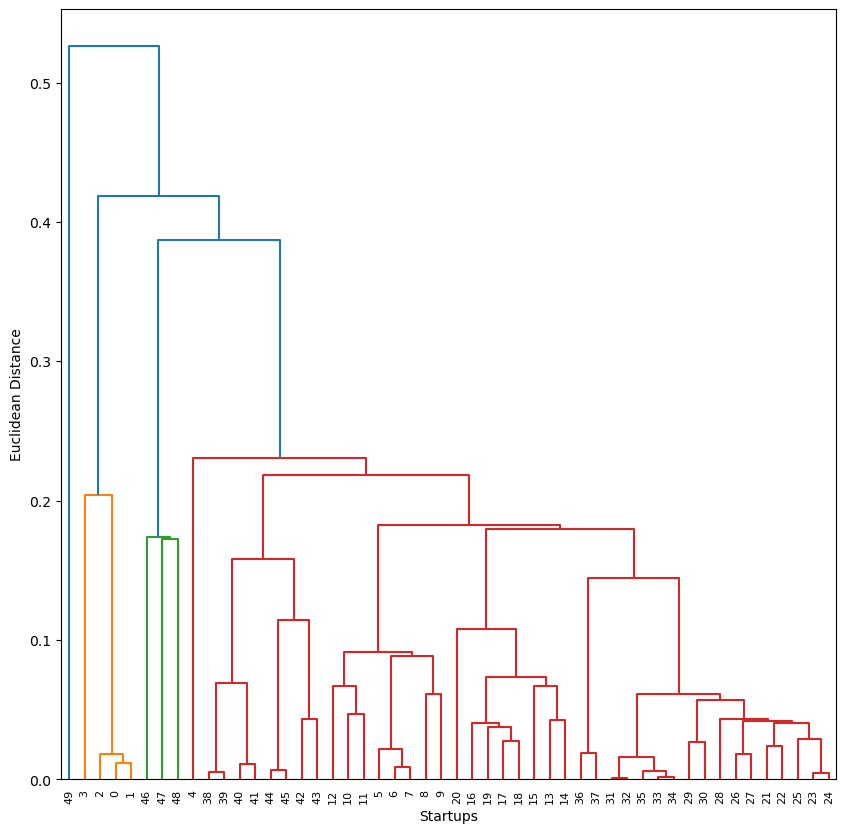

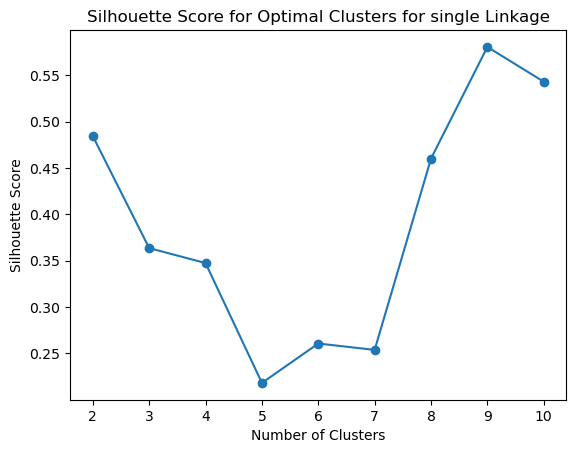

AVERAGE


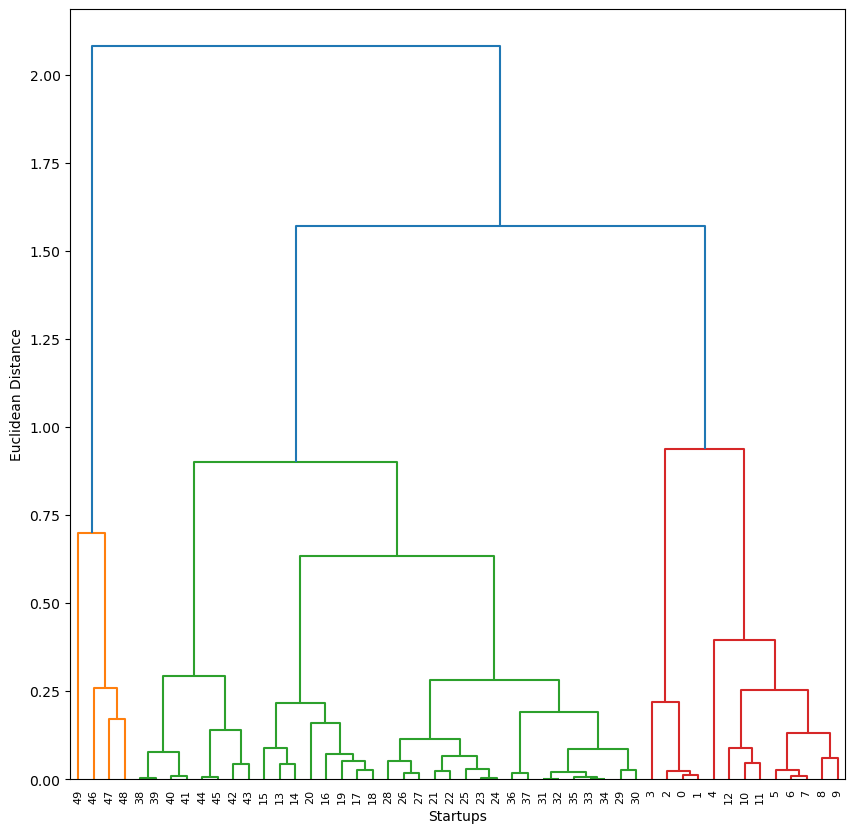

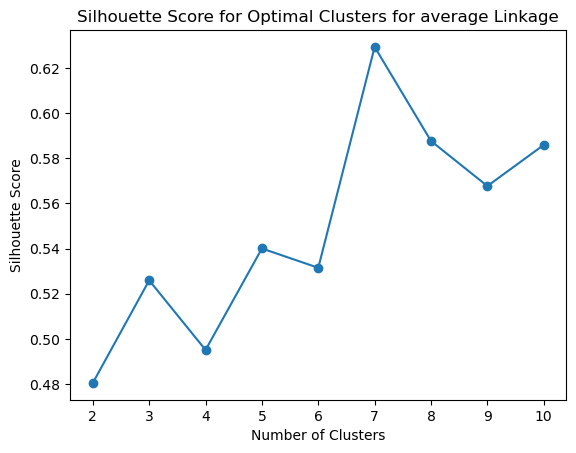

In [19]:
Links = ['ward','complete','single','average']

for link in Links:
    print(str(link).upper())
    model = AgglomerativeClustering(metric='euclidean',linkage=link)
    dt['Cluster'] = model.fit_predict(XN)
    plt.figure(figsize=(10,10))
    dendrogram(linkage(XN,method=link))
    plt.xlabel('Startups')
    plt.ylabel('Euclidean Distance')
    plt.show()

    res = []
    for n_clusters in range(2, 11):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=link, metric='euclidean')
        labels = model.fit_predict(XN)
        res.append(silhouette_score(XN, labels))



    plt.plot(range(2, 11), res, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for Optimal Clusters for {link} Linkage')
    plt.show()